<a href="https://colab.research.google.com/github/Jdean4747/Data5600HW/blob/main/HW5_5600_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [17]:
df_poly = pd.read_csv('/content/boston_clean.csv')

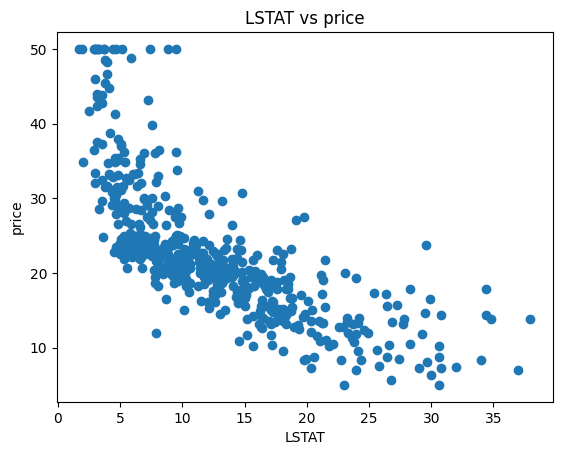

In [18]:
x= np.array(df_poly['LSTAT'])
y= np.array(df_poly['price'])

plt.scatter(x,y)
plt.xlabel('LSTAT')
plt.ylabel('price')
plt.title('LSTAT vs price')
plt.show()

In [19]:
pol = PolynomialFeatures(degree=5)
x_pol = pol.fit_transform(x.reshape(-1,1))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.3, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
y_hat_test = model.predict(X_test)

In [21]:
resid = y_test - y_hat_test
predict = pd.DataFrame({'y_test': y_test, 'y_hat_test': y_hat_test, 'resid': resid})
predict.head()

,y_test,y_hat_test,resid
0,34.6,27.114768,7.485232
1,31.5,37.217467,-5.717467
2,20.6,23.184036,-2.584036
3,14.5,20.155145,-5.655145
4,16.2,21.151035,-4.951035


In [22]:
RMSE_test = np.sqrt(mean_squared_error(y_test, y_hat_test))
print(RMSE_test)

6.149885508800067


In [23]:
RMSE_5 = np.mean(np.sqrt(-cross_val_score(model, x_pol, y, cv=5, scoring='neg_mean_squared_error')))
print(RMSE_5)

5.308273881043282


In [24]:
def my_polynomial_regression(poly_degree, X, y, test_size=0.2, rand_state=100):

    poly_features= PolynomialFeatures(degree=poly_degree)

    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)


    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)

    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)

   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)
    R2_train  = round(poly_model.score(X_train, y_train),3)


    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)
    R2_test  =  round(poly_model.score(X_test, y_test),3)



#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))

    return poly_degree, RMSE_train, RMSE_test, R2_train, R2_test

   Degree  RMSE_train  RMSE_test
0       1        6.10       6.63
1       2        5.36       6.05
2       3        5.23       5.90
3       4        5.11       5.78
4       5        4.99       5.89
5       6        4.97       5.97
6       7        4.97       5.97
7       8        4.97       5.92
8       9        5.08       5.92
9      10        5.35       5.99


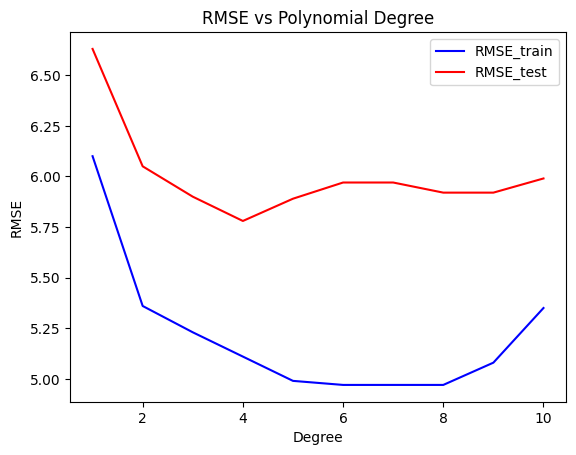

In [26]:
results = []
for degree in range(1, 11):
    degree, RMSE_train, RMSE_test, R2_train, R2_test = my_polynomial_regression(degree, x, y)
    results.append((degree, RMSE_train, RMSE_test))

degree_table = pd.DataFrame(results, columns=['Degree', 'RMSE_train', 'RMSE_test'])
print(degree_table)

plt.plot(degree_table['Degree'], degree_table['RMSE_train'], label='RMSE_train', color='blue')
plt.plot(degree_table['Degree'], degree_table['RMSE_test'], label='RMSE_test', color='red')
plt.title('RMSE vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

I would say degree 5 is the best because the RMSE_train is 0.02 from its lowest point. RMSE_test is 0.9 away from it's lowest point, but if we were to choose degree 4 (lowest RMSE_test) then RMSE_train would be 0.13 away from the lowest which is more than 0.9. Increasing the degree above 5 will make the data worse because the train goes down while the test goes up leading to overfitting.